# Import Packages

In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import statsmodels
import scipy
from scipy import stats
from scipy.stats import boxcox
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison
from statsmodels.stats.proportion import proportions_ztest
from statsmodels.stats.proportion import proportions_chisquare
from sklearn.metrics import ConfusionMatrixDisplay

# Read in Data

In [103]:
shelter = pd.read_csv(r'Animal_Shelter_Animals.csv')
pd.set_option('display.max_columns', None)
shelter.head()

,id,intakedate,intakereason,istransfer,sheltercode,identichipnumber,animalname,breedname,basecolour,speciesname,animalage,sexname,location,movementdate,movementtype,istrial,returndate,returnedreason,deceaseddate,deceasedreason,diedoffshelter,puttosleep,isdoa
0,15801,11/28/2009 12:00:00 AM,Moving,False,C09115463,0A115D7358,Jadzia,Domestic Short Hair,Tortoiseshell,Cat,11 years 8 months.,Female,Adoptable Cat Glass Colony,05/13/2017 12:00:00 AM,Adoption,False,NaN,Stray,NaN,Died in care,False,False,False
1,15932,12/08/2009 12:00:00 AM,Moving,False,D09125594,0A11675477,Gonzo,German Shepherd Dog/Mix,Tan,Dog,10 years 9 months.,Male,Adoptable Dogs,04/24/2017 12:00:00 AM,Adoption,False,NaN,Stray,NaN,Died in care,False,False,False
2,28859,08/10/2012 12:00:00 AM,Abandoned,False,D12082309,0A13253C7B,Maggie,Shep Mix/Siberian Husky,Various,Dog,8 years 1 month.,Female,Canine intake room,04/15/2017 12:00:00 AM,Adoption,False,02/28/2020 12:00:00 AM,Stray,NaN,Died in care,False,False,False
3,28859,08/10/2012 12:00:00 AM,Abandoned,False,D12082309,0A13253C7B,Maggie,Shep Mix/Siberian Husky,Various,Dog,8 years 1 month.,Female,Canine intake room,02/29/2020 12:00:00 AM,Reclaimed,False,NaN,Stray,NaN,Died in care,False,False,False
4,30812,01/11/2013 12:00:00 AM,Abandoned,False,C1301091,0A13403D4D,Pretty Girl,Domestic Short Hair,Dilute tortoiseshell,Cat,10 years 6 months.,Female,Stray Cats,04/18/2017 12:00:00 AM,Foster,False,05/29/2018 12:00:00 AM,Stray,NaN,Died in care,False,False,False


# Check Data Types

In [16]:
shelter.dtypes

id                   int64
intakedate          object
intakereason        object
istransfer            bool
sheltercode         object
identichipnumber    object
animalname          object
breedname           object
basecolour          object
speciesname         object
animalage           object
sexname             object
location            object
movementdate        object
movementtype        object
istrial               bool
returndate          object
returnedreason      object
deceaseddate        object
deceasedreason      object
diedoffshelter        bool
puttosleep            bool
isdoa                 bool
animalage_years      int64
dtype: object

## View the sum of unique values in movementtype

In [30]:
shelter.movementtype.value_counts()

Adoption            11105
Foster               4984
Reclaimed            2485
Transfer              711
None                   61
Released To Wild       36
Escaped                 9
Stolen                  8
Name: movementtype, dtype: int64

In [127]:
shelter.speciesname.value_counts()

Cat                 11708
Dog                  6661
House Rabbit          353
Guinea Pig            190
Rat                   165
Bird                   80
Livestock              40
Hamster                26
Mouse                  20
Hedgehog               18
Gerbil                 18
Snake                  14
Ferret                 14
Wildlife - other       14
Pig                    13
Lizard                 13
Chicken                10
Turtle                  8
Sugar Glider            7
Opossum                 6
Fish                    6
Goat                    5
Chinchilla              4
Tortoise                3
Raccoon                 1
Squirrel                1
Tarantula               1
Name: speciesname, dtype: int64

In [135]:
Cat = shelter.query('speciesname == "Cat"')
Cat.head()

,id,intakedate,intakereason,istransfer,sheltercode,identichipnumber,animalname,breedname,basecolour,speciesname,animalage,sexname,location,movementdate,movementtype,istrial,returndate,returnedreason,deceaseddate,deceasedreason,diedoffshelter,puttosleep,isdoa,animalage_years
0,15801,11/28/2009 12:00:00 AM,Moving,False,C09115463,0A115D7358,Jadzia,Domestic Short Hair,Tortoiseshell,Cat,11 years 8 months.,Female,Adoptable Cat Glass Colony,05/13/2017 12:00:00 AM,Adoption,False,NaN,Stray,NaN,Died in care,False,False,False,11
4,30812,01/11/2013 12:00:00 AM,Abandoned,False,C1301091,0A13403D4D,Pretty Girl,Domestic Short Hair,Dilute tortoiseshell,Cat,10 years 6 months.,Female,Stray Cats,04/18/2017 12:00:00 AM,Foster,False,05/29/2018 12:00:00 AM,Stray,NaN,Died in care,False,False,False,10
5,30812,01/11/2013 12:00:00 AM,Abandoned,False,C1301091,0A13403D4D,Pretty Girl,Domestic Short Hair,Dilute tortoiseshell,Cat,10 years 6 months.,Female,Stray Cats,05/29/2018 12:00:00 AM,Adoption,False,NaN,Stray,NaN,Died in care,False,False,False,10
13,46437,10/26/2016 12:00:00 AM,Abandoned,False,C16103406,981020017650993,Nova,Domestic Long Hair,Black,Cat,12 years 3 months.,Female,Stray Cats,03/25/2017 12:00:00 AM,Foster,False,04/07/2017 12:00:00 AM,Stray,02/10/2018 12:00:00 AM,"UU - untreatable, unmanageable health",False,True,False,12
14,46437,10/26/2016 12:00:00 AM,Abandoned,False,C16103406,981020017650993,Nova,Domestic Long Hair,Black,Cat,12 years 3 months.,Female,Stray Cats,04/07/2017 12:00:00 AM,Adoption,False,02/09/2018 12:00:00 AM,Incompatible with owner lifestyle,02/10/2018 12:00:00 AM,"UU - untreatable, unmanageable health",False,True,False,12


In [134]:
Cat.shape

(11708, 24)

In [132]:
Dog = shelter.query('speciesname == "Dog"')
Dog.shape

(6661, 24)

## Bar graph of movementtypes

<AxesSubplot:title={'center':'Movement Type'}>

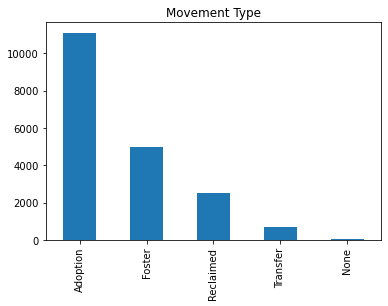

In [31]:
plt.title('Movement Type')
shelter['movementtype'].value_counts().nlargest(5).plot.bar()

# Data Wrangling
## Split animal age into years only

In [104]:
shelter['animalage_years'] = shelter['animalage'].apply(lambda x: int(x.split()[0]))

In [105]:
shelter.head()

,id,intakedate,intakereason,istransfer,sheltercode,identichipnumber,animalname,breedname,basecolour,speciesname,animalage,sexname,location,movementdate,movementtype,istrial,returndate,returnedreason,deceaseddate,deceasedreason,diedoffshelter,puttosleep,isdoa,animalage_years
0,15801,11/28/2009 12:00:00 AM,Moving,False,C09115463,0A115D7358,Jadzia,Domestic Short Hair,Tortoiseshell,Cat,11 years 8 months.,Female,Adoptable Cat Glass Colony,05/13/2017 12:00:00 AM,Adoption,False,NaN,Stray,NaN,Died in care,False,False,False,11
1,15932,12/08/2009 12:00:00 AM,Moving,False,D09125594,0A11675477,Gonzo,German Shepherd Dog/Mix,Tan,Dog,10 years 9 months.,Male,Adoptable Dogs,04/24/2017 12:00:00 AM,Adoption,False,NaN,Stray,NaN,Died in care,False,False,False,10
2,28859,08/10/2012 12:00:00 AM,Abandoned,False,D12082309,0A13253C7B,Maggie,Shep Mix/Siberian Husky,Various,Dog,8 years 1 month.,Female,Canine intake room,04/15/2017 12:00:00 AM,Adoption,False,02/28/2020 12:00:00 AM,Stray,NaN,Died in care,False,False,False,8
3,28859,08/10/2012 12:00:00 AM,Abandoned,False,D12082309,0A13253C7B,Maggie,Shep Mix/Siberian Husky,Various,Dog,8 years 1 month.,Female,Canine intake room,02/29/2020 12:00:00 AM,Reclaimed,False,NaN,Stray,NaN,Died in care,False,False,False,8
4,30812,01/11/2013 12:00:00 AM,Abandoned,False,C1301091,0A13403D4D,Pretty Girl,Domestic Short Hair,Dilute tortoiseshell,Cat,10 years 6 months.,Female,Stray Cats,04/18/2017 12:00:00 AM,Foster,False,05/29/2018 12:00:00 AM,Stray,NaN,Died in care,False,False,False,10


In [153]:
variable1 = shelter.groupby('speciesname')
variable1 = variable1.count()
variable1 = variable1.sort_values(['animalage_years'], ascending=False)

In [155]:
variable1.head()

,id,intakedate,intakereason,istransfer,sheltercode,identichipnumber,animalname,breedname,basecolour,animalage,sexname,location,movementdate,movementtype,istrial,returndate,returnedreason,deceaseddate,deceasedreason,diedoffshelter,puttosleep,isdoa,animalage_years
speciesname,,,,,,,,,,,,,,,,,,,,,,,
Cat,11708,11708,11707,11708,11708,10676,11708,11708,11708,11708,11708,11708,11653,11708,11708,4411,11708,347,11708,11708,11708,11708,11708
Dog,6661,6661,6661,6661,6661,5674,6661,6660,6661,6661,6661,6661,6657,6661,6661,2124,6661,187,6661,6661,6661,6661,6661
House Rabbit,353,353,352,353,353,2,353,353,353,353,353,353,353,353,353,89,353,3,353,353,353,353,353
Guinea Pig,190,190,190,190,190,0,190,186,190,190,190,190,190,190,190,19,190,0,190,190,190,190,190
Rat,165,165,165,165,165,0,165,165,165,165,165,165,165,165,165,9,165,0,165,165,165,165,165


## Split Dates and Remove Time

In [106]:
shelter1 = shelter['intakedate'].str.split(' ', expand = True).rename(columns = lambda x: "intakedate"+str(x+1))

In [107]:
shelter1.head()

,intakedate1,intakedate2,intakedate3
0,11/28/2009,12:00:00,AM
1,12/08/2009,12:00:00,AM
2,08/10/2012,12:00:00,AM
3,08/10/2012,12:00:00,AM
4,01/11/2013,12:00:00,AM


In [108]:
shelter2 = shelter['movementdate'].str.split(' ', expand = True).rename(columns = lambda x: "movementDate"+str(x+1))

In [109]:
shelter2.head()

,movementDate1,movementDate2,movementDate3
0,05/13/2017,12:00:00,AM
1,04/24/2017,12:00:00,AM
2,04/15/2017,12:00:00,AM
3,02/29/2020,12:00:00,AM
4,04/18/2017,12:00:00,AM


In [110]:
shelter3 = shelter['returndate'].str.split(' ', expand = True).rename(columns = lambda x: "returndate"+str(x+1))

In [111]:
shelter3.head()

,returndate1,returndate2,returndate3
0,NaN,NaN,NaN
1,NaN,NaN,NaN
2,02/28/2020,12:00:00,AM
3,NaN,NaN,NaN
4,05/29/2018,12:00:00,AM


In [112]:
shelter4 = shelter['deceaseddate'].str.split(' ', expand = True).rename(columns = lambda x: "deceaseddate"+str(x+1))

In [113]:
shelter4.head()

,deceaseddate1,deceaseddate2,deceaseddate3
0,NaN,NaN,NaN
1,NaN,NaN,NaN
2,NaN,NaN,NaN
3,NaN,NaN,NaN
4,NaN,NaN,NaN


## Add split columns back and rename date-only columns

In [114]:
shelter5 = pd.concat([shelter, shelter1, shelter2, shelter3, shelter4], axis = 1)

In [115]:
shelter5.head()

,id,intakedate,intakereason,istransfer,sheltercode,identichipnumber,animalname,breedname,basecolour,speciesname,animalage,sexname,location,movementdate,movementtype,istrial,returndate,returnedreason,deceaseddate,deceasedreason,diedoffshelter,puttosleep,isdoa,animalage_years,intakedate1,intakedate2,intakedate3,movementDate1,movementDate2,movementDate3,returndate1,returndate2,returndate3,deceaseddate1,deceaseddate2,deceaseddate3
0,15801,11/28/2009 12:00:00 AM,Moving,False,C09115463,0A115D7358,Jadzia,Domestic Short Hair,Tortoiseshell,Cat,11 years 8 months.,Female,Adoptable Cat Glass Colony,05/13/2017 12:00:00 AM,Adoption,False,NaN,Stray,NaN,Died in care,False,False,False,11,11/28/2009,12:00:00,AM,05/13/2017,12:00:00,AM,NaN,NaN,NaN,NaN,NaN,NaN
1,15932,12/08/2009 12:00:00 AM,Moving,False,D09125594,0A11675477,Gonzo,German Shepherd Dog/Mix,Tan,Dog,10 years 9 months.,Male,Adoptable Dogs,04/24/2017 12:00:00 AM,Adoption,False,NaN,Stray,NaN,Died in care,False,False,False,10,12/08/2009,12:00:00,AM,04/24/2017,12:00:00,AM,NaN,NaN,NaN,NaN,NaN,NaN
2,28859,08/10/2012 12:00:00 AM,Abandoned,False,D12082309,0A13253C7B,Maggie,Shep Mix/Siberian Husky,Various,Dog,8 years 1 month.,Female,Canine intake room,04/15/2017 12:00:00 AM,Adoption,False,02/28/2020 12:00:00 AM,Stray,NaN,Died in care,False,False,False,8,08/10/2012,12:00:00,AM,04/15/2017,12:00:00,AM,02/28/2020,12:00:00,AM,NaN,NaN,NaN
3,28859,08/10/2012 12:00:00 AM,Abandoned,False,D12082309,0A13253C7B,Maggie,Shep Mix/Siberian Husky,Various,Dog,8 years 1 month.,Female,Canine intake room,02/29/2020 12:00:00 AM,Reclaimed,False,NaN,Stray,NaN,Died in care,False,False,False,8,08/10/2012,12:00:00,AM,02/29/2020,12:00:00,AM,NaN,NaN,NaN,NaN,NaN,NaN
4,30812,01/11/2013 12:00:00 AM,Abandoned,False,C1301091,0A13403D4D,Pretty Girl,Domestic Short Hair,Dilute tortoiseshell,Cat,10 years 6 months.,Female,Stray Cats,04/18/2017 12:00:00 AM,Foster,False,05/29/2018 12:00:00 AM,Stray,NaN,Died in care,False,False,False,10,01/11/2013,12:00:00,AM,04/18/2017,12:00:00,AM,05/29/2018,12:00:00,AM,NaN,NaN,NaN


In [116]:
shelter5.drop(['intakedate', 'movementdate', 'returndate', 'deceaseddate'], axis=1, inplace=True)

In [117]:
shelter5.rename(columns={'intakedate1' : 'intakedate', 'movementDate1' : 'movementDate', 'returndate1' : 'returndate',
                        'deceaseddate1' : 'deceaseddate'}, inplace=True)

In [98]:
shelter5.head()

,id,intakereason,istransfer,sheltercode,identichipnumber,animalname,breedname,basecolour,speciesname,animalage,sexname,location,movementtype,istrial,returnedreason,deceasedreason,diedoffshelter,puttosleep,isdoa,animalage_years,intakedate,intakedate2,intakedate3,movementDate,movementDate2,movementDate3,returndate,returndate2,returndate3,deceaseddate,deceaseddate2,deceaseddate3
0,15801,Moving,False,C09115463,0A115D7358,Jadzia,Domestic Short Hair,Tortoiseshell,Cat,11 years 8 months.,Female,Adoptable Cat Glass Colony,Adoption,False,Stray,Died in care,False,False,False,11,11/28/2009,12:00:00,AM,05/13/2017,12:00:00,AM,NaN,NaN,NaN,NaN,NaN,NaN
1,15932,Moving,False,D09125594,0A11675477,Gonzo,German Shepherd Dog/Mix,Tan,Dog,10 years 9 months.,Male,Adoptable Dogs,Adoption,False,Stray,Died in care,False,False,False,10,12/08/2009,12:00:00,AM,04/24/2017,12:00:00,AM,NaN,NaN,NaN,NaN,NaN,NaN
2,28859,Abandoned,False,D12082309,0A13253C7B,Maggie,Shep Mix/Siberian Husky,Various,Dog,8 years 1 month.,Female,Canine intake room,Adoption,False,Stray,Died in care,False,False,False,8,08/10/2012,12:00:00,AM,04/15/2017,12:00:00,AM,02/28/2020,12:00:00,AM,NaN,NaN,NaN
3,28859,Abandoned,False,D12082309,0A13253C7B,Maggie,Shep Mix/Siberian Husky,Various,Dog,8 years 1 month.,Female,Canine intake room,Reclaimed,False,Stray,Died in care,False,False,False,8,08/10/2012,12:00:00,AM,02/29/2020,12:00:00,AM,NaN,NaN,NaN,NaN,NaN,NaN
4,30812,Abandoned,False,C1301091,0A13403D4D,Pretty Girl,Domestic Short Hair,Dilute tortoiseshell,Cat,10 years 6 months.,Female,Stray Cats,Foster,False,Stray,Died in care,False,False,False,10,01/11/2013,12:00:00,AM,04/18/2017,12:00:00,AM,05/29/2018,12:00:00,AM,NaN,NaN,NaN


In [118]:
shelter5.drop(['intakedate2', 'intakedate3', 'movementDate2', 'movementDate3', 'returndate2', 'returndate3', 
               'deceaseddate2', 'deceaseddate3', 'istrial', 'istransfer', 'diedoffshelter', 'isdoa'], axis=1, inplace=True)

In [119]:
shelter5.head()

,id,intakereason,sheltercode,identichipnumber,animalname,breedname,basecolour,speciesname,animalage,sexname,location,movementtype,returnedreason,deceasedreason,puttosleep,animalage_years,intakedate,movementDate,returndate,deceaseddate
0,15801,Moving,C09115463,0A115D7358,Jadzia,Domestic Short Hair,Tortoiseshell,Cat,11 years 8 months.,Female,Adoptable Cat Glass Colony,Adoption,Stray,Died in care,False,11,11/28/2009,05/13/2017,NaN,NaN
1,15932,Moving,D09125594,0A11675477,Gonzo,German Shepherd Dog/Mix,Tan,Dog,10 years 9 months.,Male,Adoptable Dogs,Adoption,Stray,Died in care,False,10,12/08/2009,04/24/2017,NaN,NaN
2,28859,Abandoned,D12082309,0A13253C7B,Maggie,Shep Mix/Siberian Husky,Various,Dog,8 years 1 month.,Female,Canine intake room,Adoption,Stray,Died in care,False,8,08/10/2012,04/15/2017,02/28/2020,NaN
3,28859,Abandoned,D12082309,0A13253C7B,Maggie,Shep Mix/Siberian Husky,Various,Dog,8 years 1 month.,Female,Canine intake room,Reclaimed,Stray,Died in care,False,8,08/10/2012,02/29/2020,NaN,NaN
4,30812,Abandoned,C1301091,0A13403D4D,Pretty Girl,Domestic Short Hair,Dilute tortoiseshell,Cat,10 years 6 months.,Female,Stray Cats,Foster,Stray,Died in care,False,10,01/11/2013,04/18/2017,05/29/2018,NaN


In [126]:
shelter.tail(15)

,id,intakedate,intakereason,istransfer,sheltercode,identichipnumber,animalname,breedname,basecolour,speciesname,animalage,sexname,location,movementdate,movementtype,istrial,returndate,returnedreason,deceaseddate,deceasedreason,diedoffshelter,puttosleep,isdoa,animalage_years
19384,72227,01/12/2022 03:29:05 PM,Stray,False,C2201041,981020045525787,Murray,Domestic Short Hair,Black and White,Cat,20 weeks.,Male,Adoptable Cat Kennels,01/23/2022 12:00:00 AM,Adoption,False,NaN,Stray,NaN,Court Order/ Legal,False,False,False,20
19385,72229,01/13/2022 09:56:31 AM,Stray,False,C2201039,981020045526356,Kuro,Domestic Short Hair,Black and White,Cat,18 weeks.,Male,Adoptable window colony,01/21/2022 12:00:00 AM,Adoption,False,NaN,Stray,NaN,Court Order/ Legal,False,False,False,18
19386,72230,01/13/2022 10:37:47 AM,Stray,False,C2201040,981020045536015,Tiptoe,Domestic Short Hair,Calico,Cat,2 years 0 months.,Female,Adoptable Cat Big Colony,01/24/2022 12:00:00 AM,Adoption,False,NaN,Stray,NaN,Court Order/ Legal,False,False,False,2
19387,72232,01/13/2022 12:43:18 PM,Incompatible with owner lifestyle,False,C2201042,981020045230711,Loki,Domestic Long Hair,Grey and White,Cat,3 years 0 months.,Male,Adoptable Cat Kennels,01/13/2022 12:00:00 AM,Adoption,False,NaN,Stray,NaN,Court Order/ Legal,False,False,False,3
19388,72233,01/13/2022 01:20:50 PM,Stray,False,H2201042,NaN,stray bun,American,Black and White,House Rabbit,99 years 1 month.,Unknown,Feline intake room,01/13/2022 12:00:00 AM,Foster,False,NaN,Stray,NaN,Court Order/ Legal,False,False,False,99
19389,72234,01/13/2022 02:34:34 PM,Moving,False,G2201043,NaN,Sandy,Guinea Pig,Brown,Guinea Pig,1 year 0 months.,Female,Small Animal room,01/22/2022 12:00:00 AM,Adoption,False,NaN,Stray,NaN,Court Order/ Legal,False,False,False,1
19390,72235,01/13/2022 02:36:11 PM,Moving,False,G2201044,NaN,Oreo,Guinea Pig,Tricolour,Guinea Pig,1 year 0 months.,Female,Small Animal room,01/22/2022 12:00:00 AM,Adoption,False,NaN,Stray,NaN,Court Order/ Legal,False,False,False,1
19391,72243,01/14/2022 08:41:06 AM,Stray,False,C2201046,981020045532583,Butch,Domestic Short Hair,Orange,Cat,3 years 0 months.,Male,Adoptable Cat Big Colony,01/21/2022 12:00:00 AM,Adoption,False,NaN,Stray,NaN,Court Order/ Legal,False,False,False,3
19392,72245,01/14/2022 10:24:03 AM,Stray,False,D2201044,982091063915522,Bruno,Australian Cattle Dog/Bully Breed Mix,White and Liver,Dog,1 year 11 months.,Male,Dog room C,01/15/2022 12:00:00 AM,Reclaimed,False,NaN,Stray,NaN,Court Order/ Legal,False,False,False,1
19393,72252,01/15/2022 10:06:40 AM,Stray,False,D2201051,NaN,Chloe,Beagle,White and Black,Dog,16 years 0 months.,Female,Dog room A,01/16/2022 12:00:00 AM,Reclaimed,False,NaN,Stray,NaN,Court Order/ Legal,False,False,False,16
